## Importing all required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score, 
    confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve
)
from sklearn.preprocessing import label_binarize

## Loading and examining the dataset

In [4]:
solar = pd.read_csv('solar_b12050_nsrdb2012_supply_curve.csv')

In [5]:
solar.head(10)

sc_point_gid       state   county  cnty_fips  latitude  longitude  \
0           416  Washington  Whatcom      53073    48.995   -122.735   
1           417  Washington  Whatcom      53073    49.022   -122.575   
2           418  Washington  Whatcom      53073    49.049   -122.415   
3           795  Washington  Whatcom      53073    48.873   -122.849   
4           796  Washington  Whatcom      53073    48.901   -122.689   
5           797  Washington  Whatcom      53073    48.928   -122.529   
6           798  Washington  Whatcom      53073    48.955   -122.369   
7           799  Washington  Whatcom      53073    48.982   -122.209   
8           800  Washington  Whatcom      53073    49.008   -122.049   
9           801  Washington  Whatcom      53073    49.035   -121.889   

   area_sq_km    elevation  timezone    dist_km  capacity_mw_ac  \
0   11.502973    23.200000        -8   0.996396      369.125182   
1   13.850433    32.833333        -8  13.957494      444.454176   
2    0.076788    33.000000        -8  13.623078        2.464092   
3    1.183896    20.000000        -8   7.467351       37.990691   
4   50.791208    39.705882        -8   0.943675     1629.867016   
5   72.144272    28.055556        -8   8.790214     2315.077211   
6   70.126802    32.000000        -8   5.937351     2250.337522   
7   26.556823   277.818182        -8   5.161981      852.196498   
8    3.635280   662.428571        -8  16.500429      116.654510   
9    0.121500  1145.000000        -8  27.655130        3.898880   

   capacity_mw_dc  mean_cf_ac  mean_lcoe  trans_cap_cost_per_mw_ac  \
0      494.627837    0.134755      65.93                  16616.68   
1      595.568638    0.131783      67.26                  87344.26   
2        3.301884    0.131583      67.38                4781735.38   
3       50.907524    0.136413      65.15                 959396.26   
4     2184.021953    0.136946      64.88                   7696.21   
5     3102.203678    0.132761      66.78                  31378.29   
6     3015.452488    0.128109      69.18                  51629.34   
7     1141.943387    0.124145      71.37                  41930.14   
8      156.317036    0.122624      72.22                 275513.12   
9        5.224500    0.127247      69.58                7885842.23   

   reinforcement_cost_per_mw_ac    lcot  total_lcoe  
0                     813613.05   42.46      108.39  
1                     813267.16   47.10      114.36  
2                     776337.82  291.11      358.49  
3                     806946.65   89.24      154.39  
4                     804270.67   40.86      105.74  
5                     788734.06   42.57      109.36  
6                     776337.82   44.54      113.73  
7                     816643.67   47.66      119.03  
8                     862356.26   63.95      136.18  
9                     862356.26  473.82      543.39

In [6]:
solar.tail(10)

sc_point_gid    state   county  cnty_fips  latitude  longitude  \
57717         97843    Texas  Cameron      48061    25.982    -97.349   
57718         97844    Texas  Cameron      48061    25.983    -97.231   
57719         98221    Texas  Cameron      48061    25.878    -97.583   
57720         98222    Texas  Cameron      48061    25.879    -97.465   
57721         98223    Texas  Cameron      48061    25.881    -97.347   
57722         99119  Florida   Monroe      12087    24.713    -81.459   
57723         99120  Florida   Monroe      12087    24.698    -81.344   
57724         99498  Florida   Monroe      12087    24.628    -81.592   
57725         99499  Florida   Monroe      12087    24.613    -81.477   
57726         99877  Florida   Monroe      12087    24.543    -81.724   

       area_sq_km  elevation  timezone    dist_km  capacity_mw_ac  \
57717   51.122339   6.642857        -6   3.364630     1640.492666   
57718    7.672887   4.000000        -6  16.222935      246.219467   
57719    0.635040  14.000000        -6   7.744844       20.378148   
57720   13.012326  12.625000        -6   4.354630      417.559676   
57721   19.738403   9.571429        -6  11.645727      633.396462   
57722    0.019116   3.000000        -5  44.076799        0.613424   
57723    0.023004   2.000000        -5  56.767896        0.738188   
57724    0.027540   1.000000        -5  21.119760        0.883746   
57725    0.036288   1.000000        -5  32.800117        1.164466   
57726    0.005508   1.000000        -5   3.079188        0.176749   

       capacity_mw_dc  mean_cf_ac  mean_lcoe  trans_cap_cost_per_mw_ac  \
57717     2198.260586    0.228193      34.61                  17090.25   
57718      329.934148    0.229618      34.39                 112686.76   
57719       27.306721    0.228506      34.58                 303012.26   
57720      559.530004    0.228701      34.55                  32251.81   
57721      848.751318    0.230290      34.31                  61173.65   
57722        0.821988    0.228602      35.20               69343208.70   
57723        0.989172    0.232199      34.64               71936226.81   
57724        1.184220    0.235552      34.15               25813426.43   
57725        1.560384    0.235916      34.10               33330472.77   
57726        0.236844    0.230707      34.86               80776194.91   

       reinforcement_cost_per_mw_ac     lcot  total_lcoe  
57717                    1296575.40    39.68       74.29  
57718                    1296575.40    42.30       76.69  
57719                    1303478.57    48.45       83.04  
57720                    1331132.74    41.09       75.64  
57721                    1331132.74    41.67       75.97  
57722                     879513.53  2117.08     2152.28  
57723                     879513.53  2161.25     2195.90  
57724                     879513.53   781.00      815.15  
57725                     879513.53   999.39     1033.49  
57726                     879513.53  2439.30     2474.16

In [7]:
solar.shape

(57727, 18)

In [8]:
solar.info()  #Provides an overview of data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57727 entries, 0 to 57726
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sc_point_gid                  57727 non-null  int64  
 1   state                         57727 non-null  object 
 2   county                        57727 non-null  object 
 3   cnty_fips                     57727 non-null  int64  
 4   latitude                      57727 non-null  float64
 5   longitude                     57727 non-null  float64
 6   area_sq_km                    57727 non-null  float64
 7   elevation                     57727 non-null  float64
 8   timezone                      57727 non-null  int64  
 9   dist_km                       57727 non-null  float64
 10  capacity_mw_ac                57727 non-null  float64
 11  capacity_mw_dc                57727 non-null  float64
 12  mean_cf_ac                    57727 non-null  float64
 13  m

In [9]:
solar.describe()  #gives basic statistics for numerical columns

sc_point_gid     cnty_fips      latitude     longitude    area_sq_km  \
count  57727.000000  57727.000000  57727.000000  57727.000000  57727.000000   
mean   45361.603236  30702.479931     38.990842    -98.824817     67.122618   
std    21409.661433  15751.106902      5.333793     13.475010     37.963474   
min      416.000000   1001.000000     24.543000   -124.761000      0.000648   
25%    28057.500000  18153.000000     34.789500   -109.527500     34.160332   
50%    44626.000000  31121.000000     39.129000    -98.781000     74.180773   
75%    62099.500000  46031.000000     43.274000    -88.449500    100.356414   
max    99877.000000  56045.000000     49.335000    -66.970000    131.949649   

          elevation     timezone       dist_km  capacity_mw_ac  \
count  57727.000000  57727.00000  57727.000000    57727.000000   
mean     747.519340     -6.34166     25.119854     2153.934442   
std      688.466863      0.96038     26.258203     1218.230653   
min      -70.333333     -8.00000      0.000000        0.020794   
25%      212.666667     -7.00000      8.535656     1096.189816   
50%      453.944444     -6.00000     17.559688     2380.427624   
75%     1239.406250     -6.00000     31.436227     3220.391764   
max     3051.500000     -4.00000    497.579104     4234.204346   

       capacity_mw_dc    mean_cf_ac     mean_lcoe  trans_cap_cost_per_mw_ac  \
count    57727.000000  57727.000000  57727.000000              5.772700e+04   
mean      2886.272562      0.208325     41.590792              1.507095e+06   
std       1632.429368      0.027095      6.402829              2.876075e+07   
min          0.027864      0.117218     30.990000              2.573900e+02   
25%       1468.894281      0.189304     37.160000              5.490550e+04   
50%       3189.773237      0.206054     40.190000              9.524620e+04   
75%       4315.325775      0.225988     45.600000              1.834956e+05   
max       5673.834891      0.272448     75.850000              2.848963e+09   

       reinforcement_cost_per_mw_ac           lcot     total_lcoe  
count                  5.772700e+04   57727.000000   57727.000000  
mean                   7.597527e+05      79.694955     121.285731  
std                    7.251411e+05    1102.967973    1103.316851  
min                    1.473530e+03       0.400000      32.600000  
25%                    3.159503e+05      13.790000      53.200000  
50%                    5.472943e+05      22.490000      63.520000  
75%                    9.227936e+05      38.630000      82.140000  
max                    7.291755e+06  120067.110000  120121.640000

In [10]:
solar.isna().sum()  #check for null values

sc_point_gid                    0
state                           0
county                          0
cnty_fips                       0
latitude                        0
longitude                       0
area_sq_km                      0
elevation                       0
timezone                        0
dist_km                         0
capacity_mw_ac                  0
capacity_mw_dc                  0
mean_cf_ac                      0
mean_lcoe                       0
trans_cap_cost_per_mw_ac        0
reinforcement_cost_per_mw_ac    0
lcot                            0
total_lcoe                      0
dtype: int64

In [11]:
solar.duplicated().sum() #check for duplicate values

0

## Cleaning and understanding the data

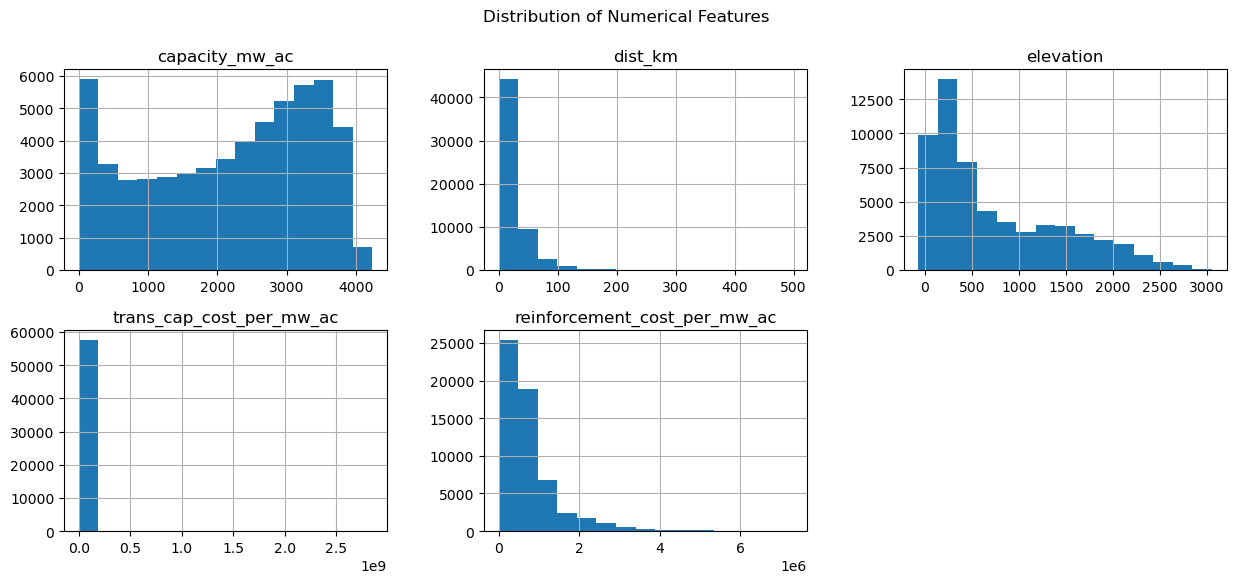

In [13]:
# Plot distributions of key numeric features
numeric_features = ['capacity_mw_ac', 'dist_km', 'elevation', 'trans_cap_cost_per_mw_ac', 'reinforcement_cost_per_mw_ac']
solar[numeric_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [14]:
solar.columns

Index(['sc_point_gid', 'state', 'county', 'cnty_fips', 'latitude', 'longitude',
       'area_sq_km', 'elevation', 'timezone', 'dist_km', 'capacity_mw_ac',
       'capacity_mw_dc', 'mean_cf_ac', 'mean_lcoe', 'trans_cap_cost_per_mw_ac',
       'reinforcement_cost_per_mw_ac', 'lcot', 'total_lcoe'],
      dtype='object')

In [15]:
solar['state'].value_counts()

state
Texas                   5247
California              2807
Montana                 2796
New Mexico              2303
Nevada                  2026
Arizona                 1999
Oregon                  1909
Colorado                1843
Wyoming                 1732
Kansas                  1619
Idaho                   1600
Utah                    1565
South Dakota            1510
Nebraska                1506
Minnesota               1484
North Dakota            1394
Oklahoma                1362
Missouri                1346
Michigan                1300
Washington              1243
Wisconsin               1140
Georgia                 1138
Florida                 1121
Illinois                1117
Iowa                    1100
Arkansas                1037
Alabama                 1020
New York                1009
North Carolina           995
Mississippi              938
Louisiana                895
Pennsylvania             888
Ohio                     824
Tennessee                819
Virginia

## Visualization

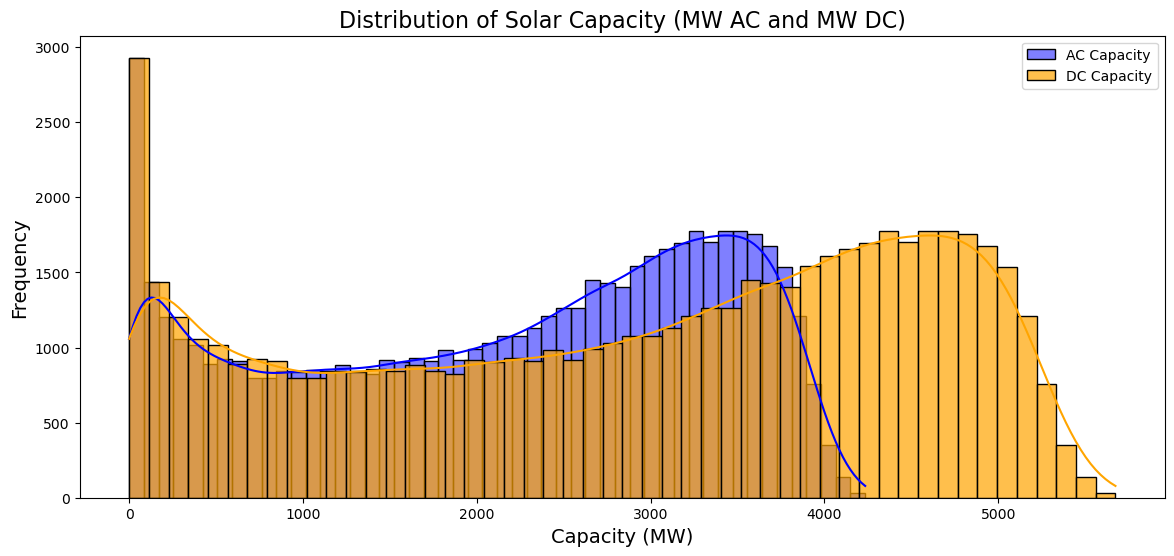

In [17]:
# Distribution of Capacity (MW AC and MW DC)
plt.figure(figsize=(14, 6))
sns.histplot(solar['capacity_mw_ac'], bins=50, kde=True, color='blue', label='AC Capacity')
sns.histplot(solar['capacity_mw_dc'], bins=50, kde=True, color='orange', label='DC Capacity', alpha=0.7)
plt.title('Distribution of Solar Capacity (MW AC and MW DC)', fontsize=16)
plt.xlabel('Capacity (MW)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()



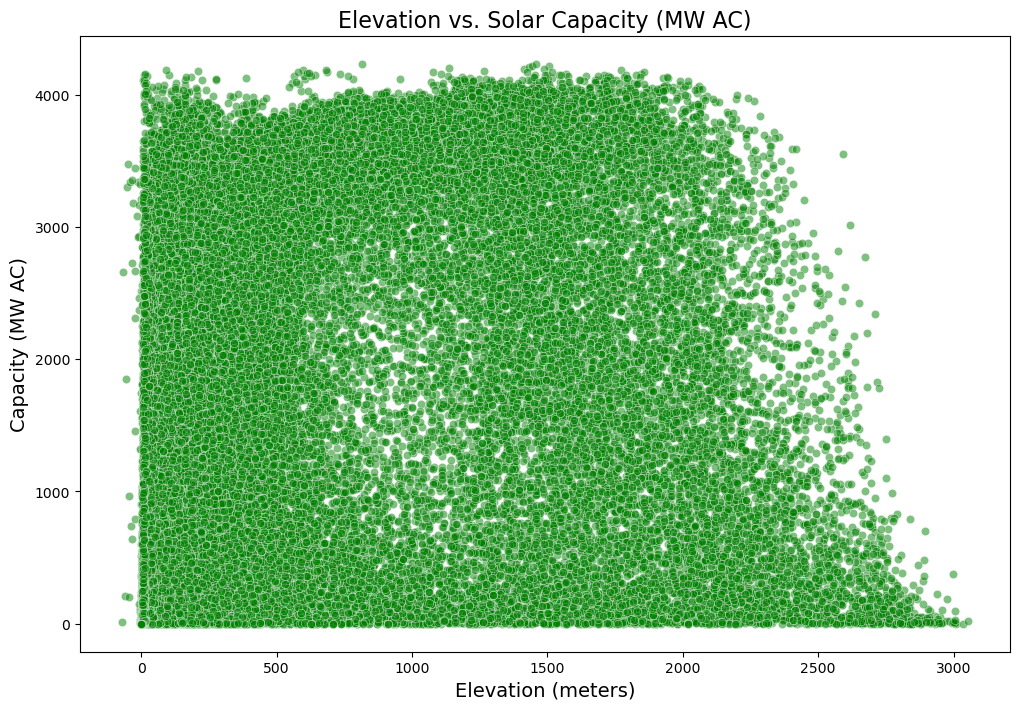

In [18]:
# Relationship Between Elevation and Capacity

plt.figure(figsize=(12, 8))
sns.scatterplot(data=solar, x='elevation', y='capacity_mw_ac', alpha=0.5, color='green')
plt.title('Elevation vs. Solar Capacity (MW AC)', fontsize=16)
plt.xlabel('Elevation (meters)', fontsize=14)
plt.ylabel('Capacity (MW AC)', fontsize=14)
plt.show()


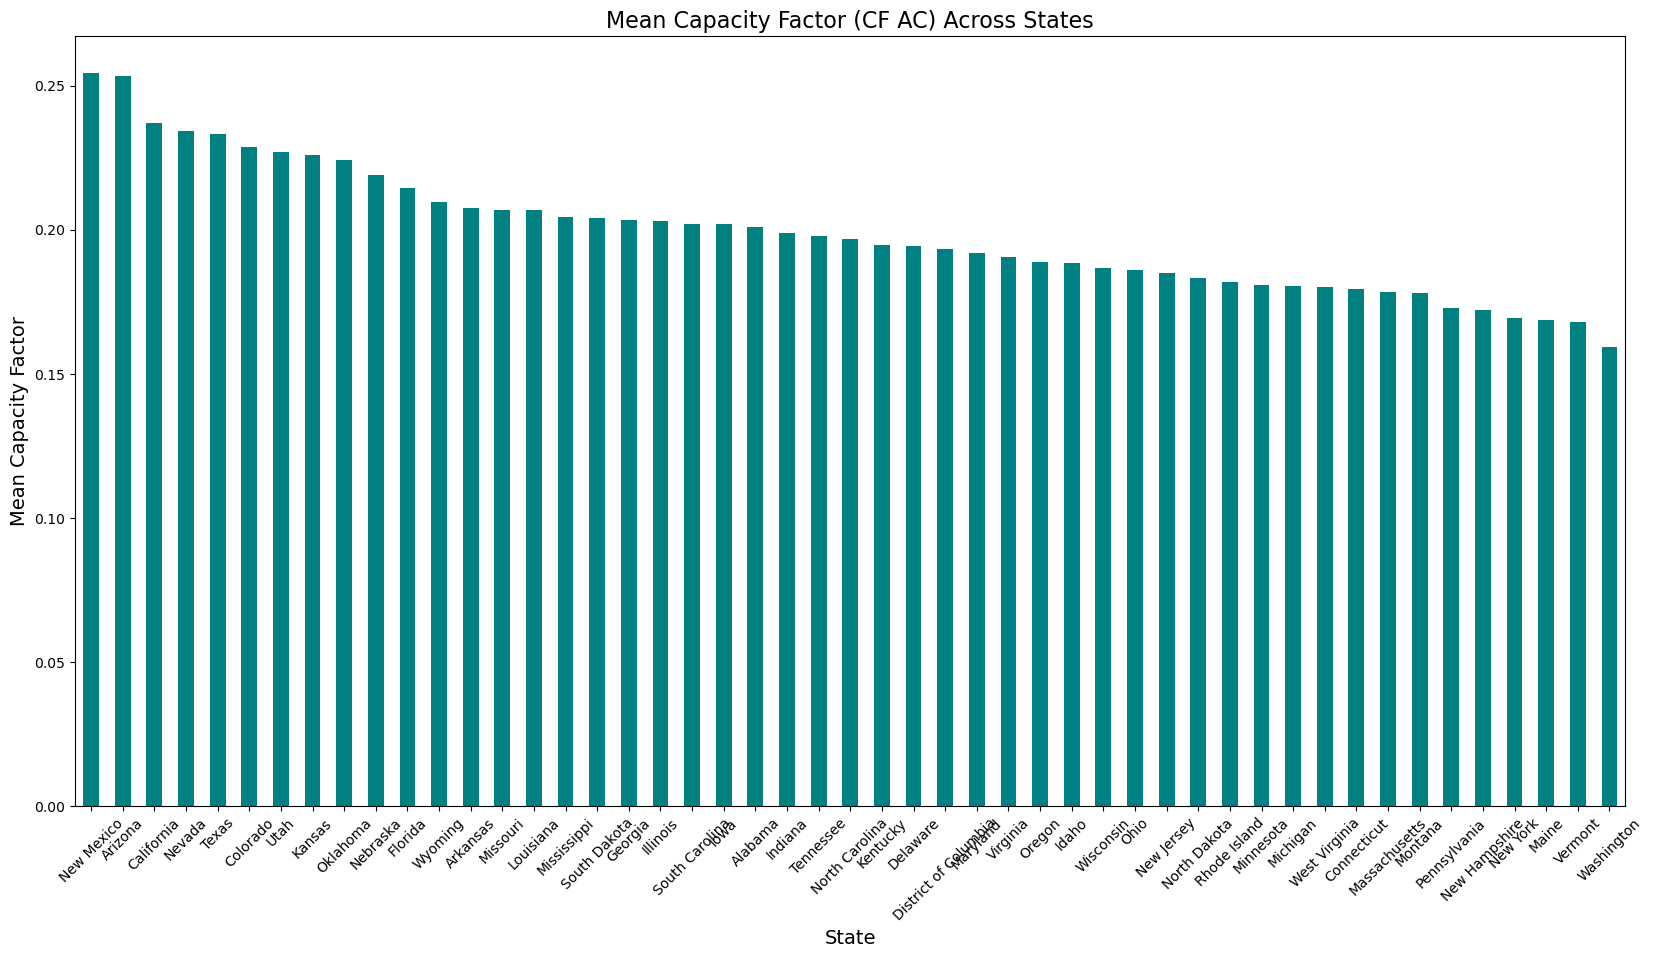

In [19]:
# Mean Capacity Factor (CF) Across States
state_cf = solar.groupby('state')['mean_cf_ac'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
state_cf.plot(kind='bar', color='teal')
plt.title('Mean Capacity Factor (CF AC) Across States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Mean Capacity Factor', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [20]:
# Cost Metrics

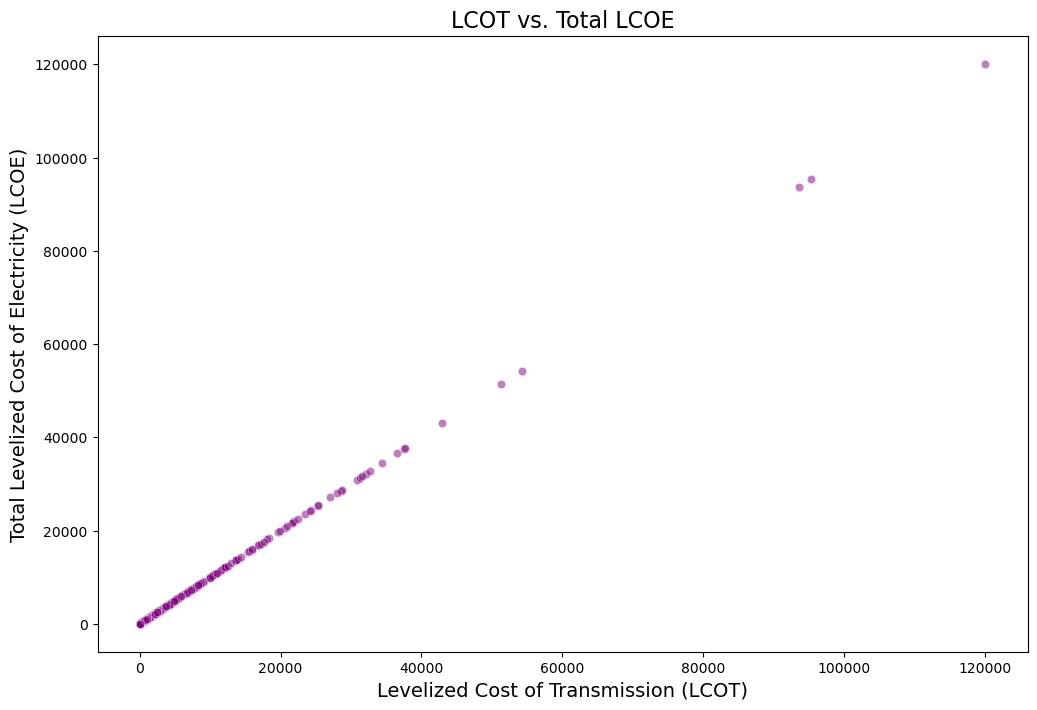

In [21]:
# Total LCOE vs LCOT
plt.figure(figsize=(12, 8))
sns.scatterplot(data=solar, x='lcot', y='total_lcoe', alpha=0.5, color='purple')
plt.title('LCOT vs. Total LCOE', fontsize=16)
plt.xlabel('Levelized Cost of Transmission (LCOT)', fontsize=14)
plt.ylabel('Total Levelized Cost of Electricity (LCOE)', fontsize=14)
plt.show()


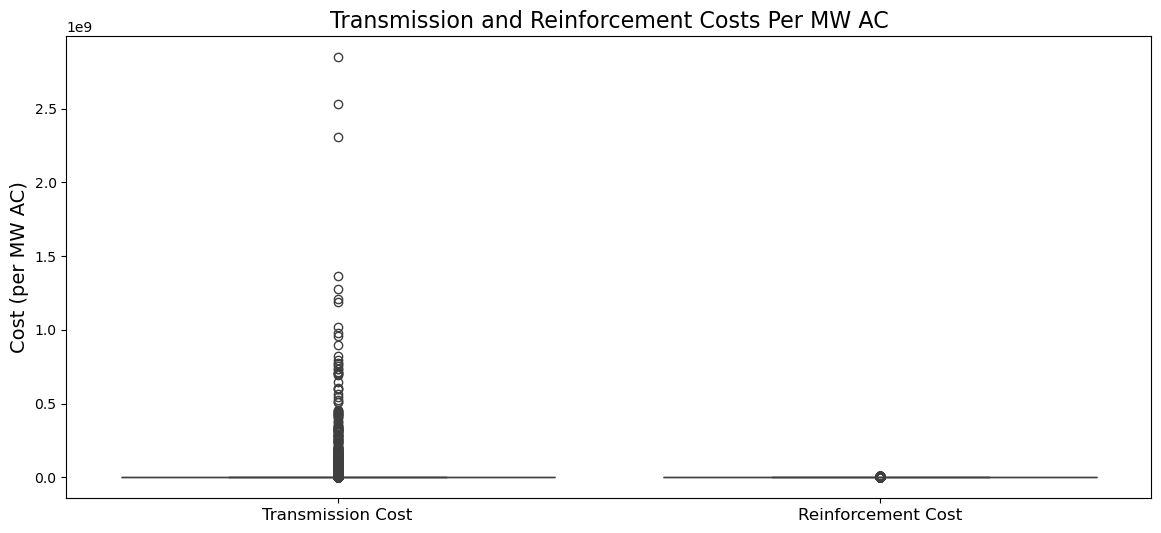

In [22]:
# Transmission and Reinforcement Costs
plt.figure(figsize=(14, 6))
sns.boxplot(data=solar[['trans_cap_cost_per_mw_ac', 'reinforcement_cost_per_mw_ac']])
plt.title('Transmission and Reinforcement Costs Per MW AC', fontsize=16)
plt.ylabel('Cost (per MW AC)', fontsize=14)
plt.xticks([0, 1], ['Transmission Cost', 'Reinforcement Cost'], fontsize=12)
plt.show()


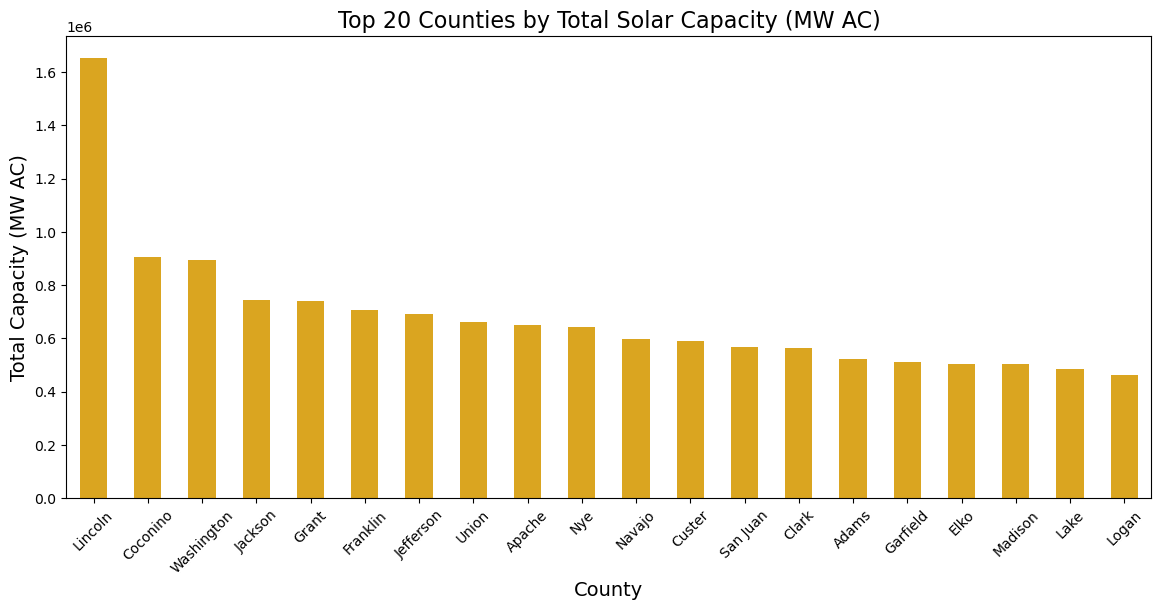

In [23]:
# Solar Capacity by County

county_capacity = solar.groupby('county')['capacity_mw_ac'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
county_capacity.plot(kind='bar', color='goldenrod')
plt.title('Top 20 Counties by Total Solar Capacity (MW AC)', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Total Capacity (MW AC)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


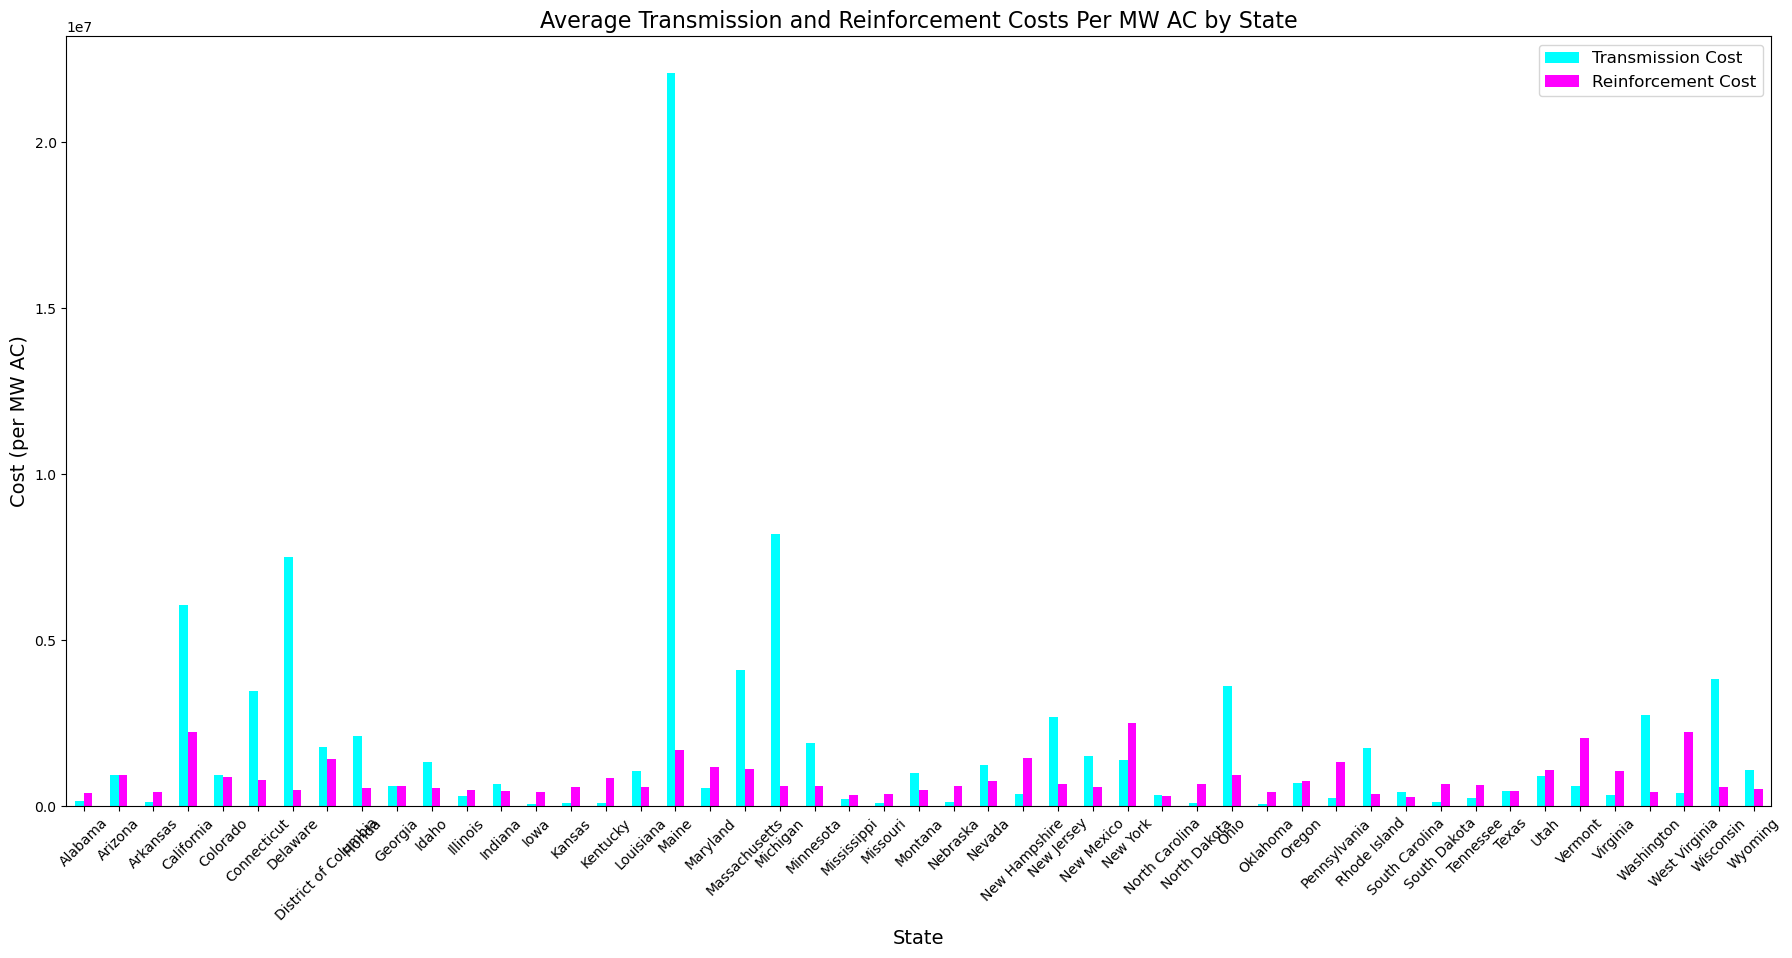

In [24]:
# Comparing Costs Across States
state_costs = solar.groupby('state')[['trans_cap_cost_per_mw_ac', 'reinforcement_cost_per_mw_ac']].mean()

state_costs.plot(kind='bar', figsize=(22, 10), color=['cyan', 'magenta'])
plt.title('Average Transmission and Reinforcement Costs Per MW AC by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Cost (per MW AC)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Transmission Cost', 'Reinforcement Cost'], fontsize=12)
plt.show()



## Data Prepration

In [26]:
pd.DataFrame(solar['county'].value_counts())

count
county             
Lincoln         762
Washington      477
Jefferson       393
Jackson         375
Franklin        358
...             ...
Harrisonburg      1
Poquoson          1
Portsmouth        1
Lynchburg         1
New York          1

[1788 rows x 1 columns]

In [27]:
solar['cnty_fips'].value_counts()

cnty_fips
4005     345
32007    328
32023    315
6071     248
4015     220
        ... 
29510      1
51630      1
51760      1
44001      1
51770      1
Name: count, Length: 3082, dtype: int64

In [28]:
# Create a dataframe with unique 'state', 'county', and 'cnty_fips' pairs
unique_state_county_fips = solar[['state', 'county', 'cnty_fips']].drop_duplicates().reset_index(drop=True)

# Display the resulting dataframe
print(unique_state_county_fips)


           state    county  cnty_fips
0     Washington   Whatcom      53073
1     Washington   Clallam      53009
2     Washington    Skagit      53057
3     Washington  Okanogan      53047
4     Washington    Island      53029
...          ...       ...        ...
3357       Texas     Starr      48427
3358       Texas   Hidalgo      48215
3359     Florida    Monroe      12087
3360       Texas   Willacy      48489
3361       Texas   Cameron      48061

[3362 rows x 3 columns]


In [29]:
# Drop 'state' and 'county' columns from the main data 
solar = solar.drop(columns=['state', 'county'])


In [30]:
# Checking whether we can access the 'state' and 'county' associated with its corresponding 'cnty_fips' with a sample value

# Filter the DataFrame to get the row where 'cnty_fips' matches the given value
def county_fips(cnty_fips_value):
    
    result = unique_state_county_fips[unique_state_county_fips['cnty_fips'] == cnty_fips_value]
    
    # Display the associated 'state' and 'county'
    if not result.empty:
        state = result['state'].values[0]
        county = result['county'].values[0]
        print(f"The state is {state} and the county is {county} for cnty_fips {cnty_fips_value}.")
    else:
        print("The given cnty_fips value was not found in the dataset.")

    return None




In [31]:
county_fips(12087)

The state is Florida and the county is Monroe for cnty_fips 12087.


In [32]:
solar.dtypes

sc_point_gid                      int64
cnty_fips                         int64
latitude                        float64
longitude                       float64
area_sq_km                      float64
elevation                       float64
timezone                          int64
dist_km                         float64
capacity_mw_ac                  float64
capacity_mw_dc                  float64
mean_cf_ac                      float64
mean_lcoe                       float64
trans_cap_cost_per_mw_ac        float64
reinforcement_cost_per_mw_ac    float64
lcot                            float64
total_lcoe                      float64
dtype: object

In [33]:
solar.columns

Index(['sc_point_gid', 'cnty_fips', 'latitude', 'longitude', 'area_sq_km',
       'elevation', 'timezone', 'dist_km', 'capacity_mw_ac', 'capacity_mw_dc',
       'mean_cf_ac', 'mean_lcoe', 'trans_cap_cost_per_mw_ac',
       'reinforcement_cost_per_mw_ac', 'lcot', 'total_lcoe'],
      dtype='object')

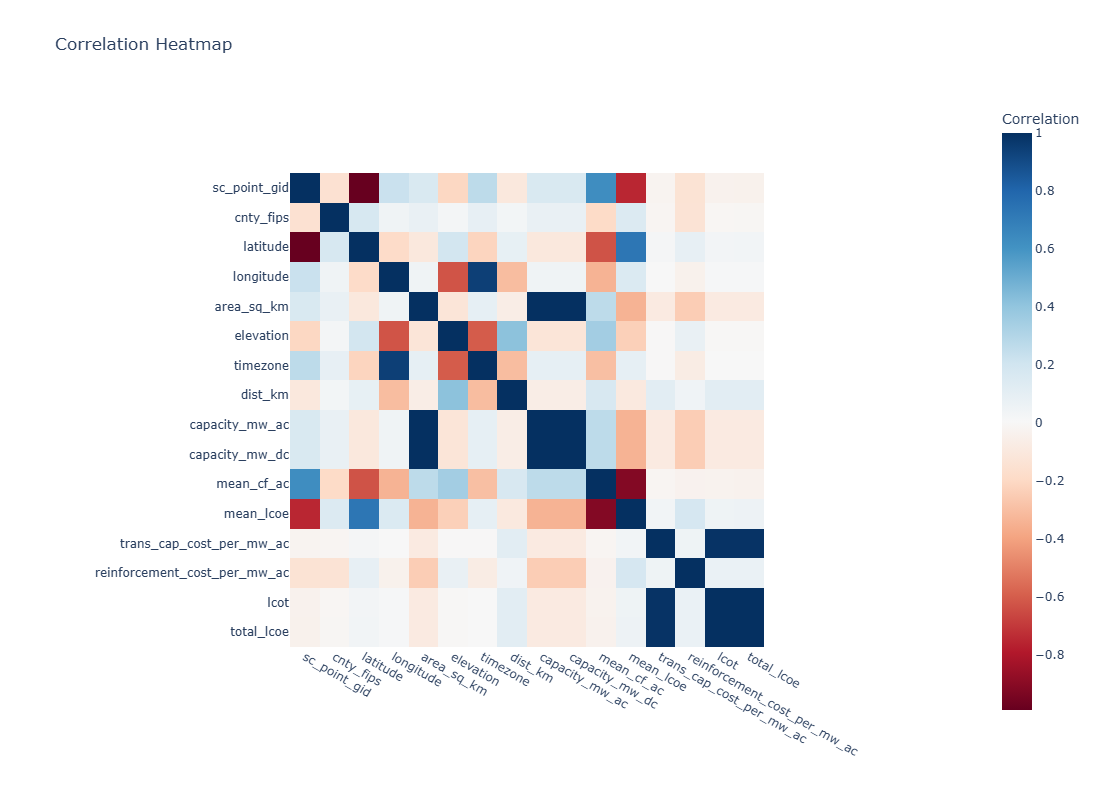

In [34]:
# Computing the correlation heatmap
solar['sc_point_gid'] = pd.to_numeric(solar['sc_point_gid'], errors='coerce') 
solar['cnty_fips'] = pd.to_numeric(solar['cnty_fips'], errors='coerce') 
solar['timezone'] = pd.to_numeric(solar['timezone'], errors='coerce') 

# Calculate the correlation matrix
corr_matrix = solar.corr()

# Plotting
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',  # Color scale for better visualization
                title="Correlation Heatmap")

fig.update_layout(width=800, height=800)
fig.show()

In [35]:
# Extract correlations with 'total_lcoe' and sort by importance
target_corr = corr_matrix['total_lcoe'].drop('total_lcoe').sort_values(key=abs, ascending=False)

# Display the most strongly correlated features
print(target_corr)

lcot                            0.999983
trans_cap_cost_per_mw_ac        0.988385
dist_km                         0.114805
capacity_mw_ac                 -0.088801
capacity_mw_dc                 -0.088801
area_sq_km                     -0.088801
reinforcement_cost_per_mw_ac    0.070766
mean_lcoe                       0.057375
sc_point_gid                   -0.041519
mean_cf_ac                     -0.038086
latitude                        0.036310
longitude                       0.012940
cnty_fips                      -0.012179
elevation                      -0.006022
timezone                        0.005562
Name: total_lcoe, dtype: float64


In [36]:
# Detect skewness in numeric columns
for col in solar:
    print(f"{col}: Skewness = {skew(solar[col])}, Kurtosis = {kurtosis(solar[col])}")



sc_point_gid: Skewness = 0.11645369443485652, Kurtosis = -0.8966726211572666
cnty_fips: Skewness = -0.2092818586166026, Kurtosis = -1.0667781287449198
latitude: Skewness = -0.10105725819857131, Kurtosis = -0.8788685381855745
longitude: Skewness = 0.05945469649879975, Kurtosis = -0.8732250984627141
area_sq_km: Skewness = -0.32049245511130675, Kurtosis = -1.1931915813708496
elevation: Skewness = 0.9737496386861126, Kurtosis = -0.11652236910080749
timezone: Skewness = -0.23492443619655112, Kurtosis = -0.8854121656920881
dist_km: Skewness = 3.127305829265697, Kurtosis = 19.688905591540465
capacity_mw_ac: Skewness = -0.32049256392422487, Kurtosis = -1.1931915612672832
capacity_mw_dc: Skewness = -0.32049245511891356, Kurtosis = -1.1931915813894318
mean_cf_ac: Skewness = 0.08419323989623424, Kurtosis = -0.35370268721460985
mean_lcoe: Skewness = 0.9477575491646646, Kurtosis = 1.3154865040793018
trans_cap_cost_per_mw_ac: Skewness = 52.55001650619748, Kurtosis = 3900.246252947053
reinforcement_c

In [37]:
# Apply a log transformation to dist_km, trans_cap_cost_per_mw_ac, reinforcement_cost_per_mw_ac, lcot, and total_lcoe since they have substantial positive skewness and large kurtosis.

solar['dist_km'] = np.log1p(solar['dist_km'])
solar['trans_cap_cost_per_mw_ac'] = np.log1p(solar['trans_cap_cost_per_mw_ac'])
solar['reinforcement_cost_per_mw_ac'] = np.log1p(solar['reinforcement_cost_per_mw_ac'])
solar['lcot'] = np.log1p(solar['lcot'])
solar['total_lcoe'] = np.log1p(solar['total_lcoe'])



In [38]:
# Features with very high kurtosis may have extreme outliers that could skew the model’s predictions.

# Clip extreme values to reduce the impact of outliers
for col in ['dist_km', 'trans_cap_cost_per_mw_ac', 'lcot', 'reinforcement_cost_per_mw_ac']:
    lower, upper = solar[col].quantile([0.01, 0.99])
    solar[col] = solar[col].clip(lower, upper)


In [39]:
# Apply log transformation to reduce skewness in target column
solar['total_lcoe'] = np.log1p(solar['total_lcoe'])  


## Feature Engineering

In [41]:
# Define thresholds for cost categories
low_cost_threshold = solar['total_lcoe'].quantile(0.33)
high_cost_threshold = solar['total_lcoe'].quantile(0.67)

# Classify each site based on total_lcoe
def classify_cost(lcoe):
    if lcoe <= low_cost_threshold:
        return 'low-cost'
    elif lcoe <= high_cost_threshold:
        return 'medium-cost'
    else:
        return 'high-cost'

solar['cost_category'] = solar['total_lcoe'].apply(classify_cost)

In [42]:
solar.head()

sc_point_gid  cnty_fips  latitude  longitude  area_sq_km  elevation  \
0           416      53073    48.995   -122.735   11.502973  23.200000   
1           417      53073    49.022   -122.575   13.850433  32.833333   
2           418      53073    49.049   -122.415    0.076788  33.000000   
3           795      53073    48.873   -122.849    1.183896  20.000000   
4           796      53073    48.901   -122.689   50.791208  39.705882   

   timezone   dist_km  capacity_mw_ac  capacity_mw_dc  mean_cf_ac  mean_lcoe  \
0        -8  0.767586      369.125182      494.627837    0.134755      65.93   
1        -8  2.705212      444.454176      595.568638    0.131783      67.26   
2        -8  2.682601        2.464092        3.301884    0.131583      67.38   
3        -8  2.136218       37.990691       50.907524    0.136413      65.15   
4        -8  0.767586     1629.867016     2184.021953    0.136946      64.88   

   trans_cap_cost_per_mw_ac  reinforcement_cost_per_mw_ac      lcot  \
0                  9.718222                     13.609241  3.771841   
1                 11.377624                     13.608816  3.873282   
2                 15.380314                     13.562344  5.677130   
3                 13.774061                     13.601014  4.502473   
4                  9.250087                     13.597692  3.734331   

   total_lcoe cost_category  
0    1.739574     high-cost  
1    1.748862     high-cost  
2    1.929300     high-cost  
3    1.799387     high-cost  
4    1.735259     high-cost

In [43]:
# since the columns 'lcot' and 'total_lcoe' are highly correlated(99%), either of them can be dropped as we have categorized the 'total_lcoe' column
solar.drop(columns=['lcot'])

sc_point_gid  cnty_fips  latitude  longitude  area_sq_km  elevation  \
0               416      53073    48.995   -122.735   11.502973  23.200000   
1               417      53073    49.022   -122.575   13.850433  32.833333   
2               418      53073    49.049   -122.415    0.076788  33.000000   
3               795      53073    48.873   -122.849    1.183896  20.000000   
4               796      53073    48.901   -122.689   50.791208  39.705882   
...             ...        ...       ...        ...         ...        ...   
57722         99119      12087    24.713    -81.459    0.019116   3.000000   
57723         99120      12087    24.698    -81.344    0.023004   2.000000   
57724         99498      12087    24.628    -81.592    0.027540   1.000000   
57725         99499      12087    24.613    -81.477    0.036288   1.000000   
57726         99877      12087    24.543    -81.724    0.005508   1.000000   

       timezone   dist_km  capacity_mw_ac  capacity_mw_dc  mean_cf_ac  \
0            -8  0.767586      369.125182      494.627837    0.134755   
1            -8  2.705212      444.454176      595.568638    0.131783   
2            -8  2.682601        2.464092        3.301884    0.131583   
3            -8  2.136218       37.990691       50.907524    0.136413   
4            -8  0.767586     1629.867016     2184.021953    0.136946   
...         ...       ...             ...             ...         ...   
57722        -5  3.808368        0.613424        0.821988    0.228602   
57723        -5  4.056433        0.738188        0.989172    0.232199   
57724        -5  3.096471        0.883746        1.184220    0.235552   
57725        -5  3.520464        1.164466        1.560384    0.235916   
57726        -5  1.405898        0.176749        0.236844    0.230707   

       mean_lcoe  trans_cap_cost_per_mw_ac  reinforcement_cost_per_mw_ac  \
0          65.93                  9.718222                     13.609241   
1          67.26                 11.377624                     13.608816   
2          67.38                 15.380314                     13.562344   
3          65.15                 13.774061                     13.601014   
4          64.88                  9.250087                     13.597692   
...          ...                       ...                           ...   
57722      35.20                 16.390294                     13.687125   
57723      34.64                 16.390294                     13.687125   
57724      34.15                 16.390294                     13.687125   
57725      34.10                 16.390294                     13.687125   
57726      34.86                 16.390294                     13.687125   

       total_lcoe cost_category  
0        1.739574     high-cost  
1        1.748862     high-cost  
2        1.929300     high-cost  
3        1.799387     high-cost  
4        1.735259     high-cost  
...           ...           ...  
57722    2.160416     high-cost  
57723    2.162725     high-cost  
57724    2.041817     high-cost  
57725    2.072123     high-cost  
57726    2.176348     high-cost  

[57727 rows x 16 columns]

In [44]:
# Since it is a large dataset, sampling it into 27000 rows ensuring equal representation from each "cost category" (high-cost, medium-cost, low-cost)
# each category should have 27000/3=9000 rows
# Stratified Sampling: Use the sample function with stratify to select an equal number of samples from each category.

# Checking the distribution of the cost categories to confirm there are enough samples in each.
print(solar['cost_category'].value_counts())


cost_category
medium-cost    19626
low-cost       19052
high-cost      19049
Name: count, dtype: int64


In [45]:
# Defining the target number of samples per category
target_samples_per_category = 9000

In [46]:
# Perform stratified sampling by cost category

solar = solar.groupby('cost_category', group_keys=False).apply(lambda x: x.sample(n=9000, random_state=42)).reset_index(drop=True)

C:\Users\Amritha\AppData\Local\Temp\ipykernel_13580\2663044318.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [47]:
# Check the new distribution to confirm it is balanced
print(solar['cost_category'].value_counts())

# Display the resulting DataFrame shape
print("Sampled DataFrame Shape:", solar.shape)

cost_category
high-cost      9000
low-cost       9000
medium-cost    9000
Name: count, dtype: int64
Sampled DataFrame Shape: (27000, 17)


In [48]:
label_encoder = LabelEncoder()

# Apply label encoding to 'cost_category' column
solar['cost_category'] = label_encoder.fit_transform(solar['cost_category'])

In [49]:
# Separating features and target variable

x = solar.drop(columns=['total_lcoe', 'cost_category'])
y = solar['cost_category']

In [50]:
# Scaling the features

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


## Train-test split

In [52]:
# Splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## Hyperparameter tuning 

In [54]:
# Initialize dictionary to store best parameters and scores after tuning

# best_params = {}
# best_scores = {}


In [55]:
# 1. Random Forest

# param_grid_rf = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }
# grid_rf = GridSearchCV(RandomForestClassifier(random_state=12), param_grid_rf, cv=5, scoring='accuracy')
# grid_rf.fit(x_train, y_train)
# best_params['Random Forest'] = grid_rf.best_params_
# best_scores['Random Forest'] = grid_rf.best_score_



In [56]:
# 2. Decision Tree

# param_grid_dt = {
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
# grid_dt.fit(x_train, y_train)
# best_params['Decision Tree'] = grid_dt.best_params_
# best_scores['Decision Tree'] = grid_dt.best_score_



In [57]:
# 3. K-Nearest Neighbors

# param_grid_knn = {
#     'n_neighbors': [5, 10, 15, 20],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
# grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
# grid_knn.fit(x_train, y_train)
# best_params['K-Nearest Neighbors'] = grid_knn.best_params_
# best_scores['K-Nearest Neighbors'] = grid_knn.best_score_



In [58]:
# 4. AdaBoost

# param_grid_ab = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1],
# }
# grid_ab = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ab, cv=5, scoring='accuracy')
# grid_ab.fit(x_train, y_train)
# best_params['AdaBoost'] = grid_ab.best_params_
# best_scores['AdaBoost'] = grid_ab.best_score_



In [59]:
# 5. Gradient Boosting

# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }
# grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
# grid_gb.fit(x_train, y_train)
# best_params['Gradient Boosting'] = grid_gb.best_params_
# best_scores['Gradient Boosting'] = grid_gb.best_score_


In [60]:
# 6. XGBoost

# param_grid_xgb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7]
# }
# grid_xgb = GridSearchCV(XGBClassifier(random_state=43), param_grid_xgb, cv=5, scoring='accuracy')
# grid_xgb.fit(x_train, y_train)
# best_params['XGBoost'] = grid_xgb.best_params_
# best_scores['XGBoost'] = grid_xgb.best_score_



In [61]:
# Display best parameters and scores for each model

# for model, params in best_params.items():
#     print(f"\n{model} Best Parameters: {params}")
#     print(f"{model} Best Cross-Val Score: {best_scores[model]:.4f}")


## Training the models after finding the best parameters by hyperparameter tuning

In [63]:
# Dictionary to store results
model_scores = {}


In [64]:
# Random Forest
rf = RandomForestClassifier(random_state=12, max_depth=20, n_estimators=150, min_samples_split=2)
rf.fit(x_train, y_train)
model_scores['Random Forest'] = {
    'Train Score': rf.score(x_train, y_train),
    'Test Score': rf.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(rf, x_train, y_train, cv=5).mean()
}


In [65]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=15, random_state=42, min_samples_leaf=4, min_samples_split=2)
dt.fit(x_train, y_train)
model_scores['Decision Tree'] = {
    'Train Score': dt.score(x_train, y_train),
    'Test Score': dt.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(dt, x_train, y_train, cv=5).mean()
}

In [66]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(metric='manhattan', n_neighbors = 10, weights= 'distance')
knn.fit(x_train, y_train)
model_scores['K-Nearest Neighbors'] = {
    'Train Score': knn.score(x_train, y_train),
    'Test Score': knn.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(knn, x_train, y_train, cv=5).mean()
}


In [67]:
# AdaBoost
ab = AdaBoostClassifier(random_state=42,learning_rate=0.01, n_estimators=100)
ab.fit(x_train, y_train)
model_scores['AdaBoost'] = {
    'Train Score': ab.score(x_train, y_train),
    'Test Score': ab.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(ab, x_train, y_train, cv=5).mean()
}


C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\Amritha\anaconda3\Lib\site-packages\sklearn\ensemble\_w

In [68]:
# Gradient Boosting
gb = GradientBoostingClassifier(learning_rate= 0.01, n_estimators=100,random_state=42)
gb.fit(x_train, y_train)
model_scores['Gradient Boosting'] = {
    'Train Score': gb.score(x_train, y_train),
    'Test Score': gb.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(gb, x_train, y_train, cv=5).mean()
}



In [69]:
# XGBoost
xb = XGBClassifier(random_state=43, learning_rate= 0.2, max_depth= 7, n_estimators= 50)
xb.fit(x_train, y_train)
model_scores['XGBoost'] = {
    'Train Score': xb.score(x_train, y_train),
    'Test Score': xb.score(x_test, y_test),
    'Cross-Val Score': cross_val_score(xb, x_train, y_train, cv=5).mean()
}


In [70]:
# Display scores
for model, scores in model_scores.items():
    print(f"\n{model} Scores:")
    for score_type, score_value in scores.items():
        print(f"{score_type}: {score_value:.4f}")



Random Forest Scores:
Train Score: 1.0000
Test Score: 0.9848
Cross-Val Score: 0.9842

Decision Tree Scores:
Train Score: 0.9967
Test Score: 0.9906
Cross-Val Score: 0.9882

K-Nearest Neighbors Scores:
Train Score: 1.0000
Test Score: 0.9383
Cross-Val Score: 0.9360

AdaBoost Scores:
Train Score: 0.8393
Test Score: 0.8402
Cross-Val Score: 0.8385

Gradient Boosting Scores:
Train Score: 0.9516
Test Score: 0.9419
Cross-Val Score: 0.9461

XGBoost Scores:
Train Score: 1.0000
Test Score: 0.9944
Cross-Val Score: 0.9928


## Evaluate the model

In [72]:
# Initialize a dictionary to store the results
model_metrics = {}


In [73]:
# Binarize y_test for multiclass AUC and ROC computation
classes = sorted(set(y_test))
y_test_binarized = label_binarize(y_test, classes=classes) if len(classes) > 2 else y_test


In [74]:
# Assuming `models` is a dictionary with model names as keys and trained models as values
models = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "AdaBoost": ab,
    "Gradient Boosting": gb,
    "XGBoost": xb
}


Confusion Matrix for Random Forest:
[[1785    0   18]
 [   0 1789   21]
 [  18   25 1744]]


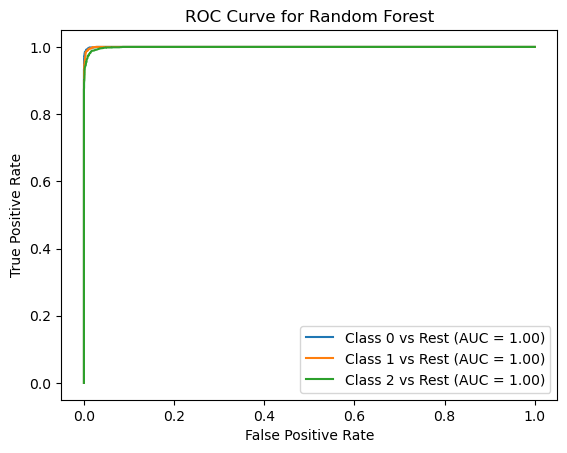


Confusion Matrix for Decision Tree:
[[1794    0    9]
 [   0 1798   12]
 [  14   16 1757]]


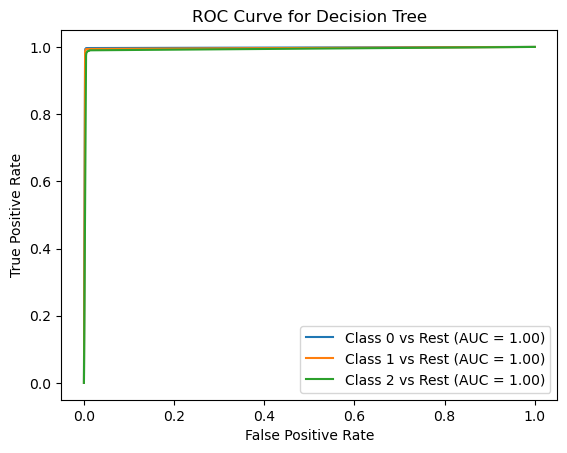


Confusion Matrix for K-Nearest Neighbors:
[[1720    0   83]
 [   0 1708  102]
 [  65   83 1639]]


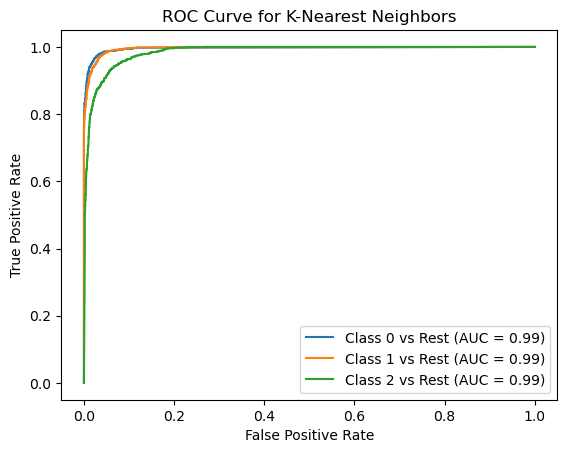


Confusion Matrix for AdaBoost:
[[1558    3  242]
 [   0 1609  201]
 [  76  341 1370]]


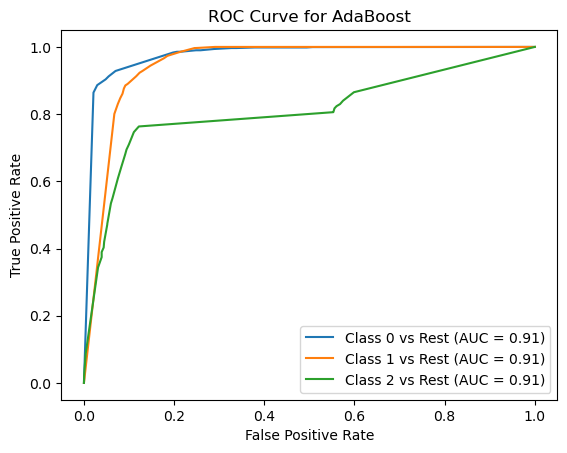


Confusion Matrix for Gradient Boosting:
[[1687    0  116]
 [   0 1742   68]
 [  29  101 1657]]


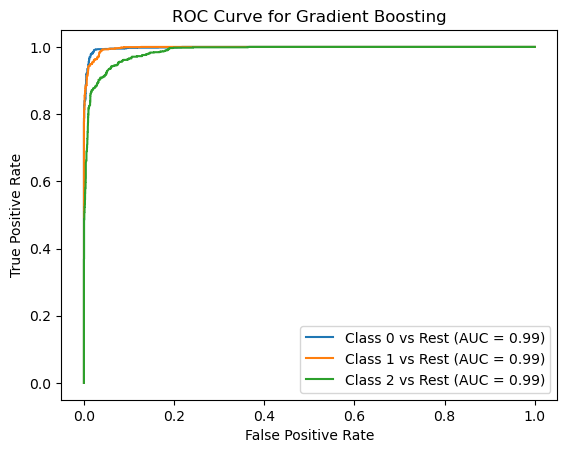


Confusion Matrix for XGBoost:
[[1798    0    5]
 [   0 1801    9]
 [   8    8 1771]]


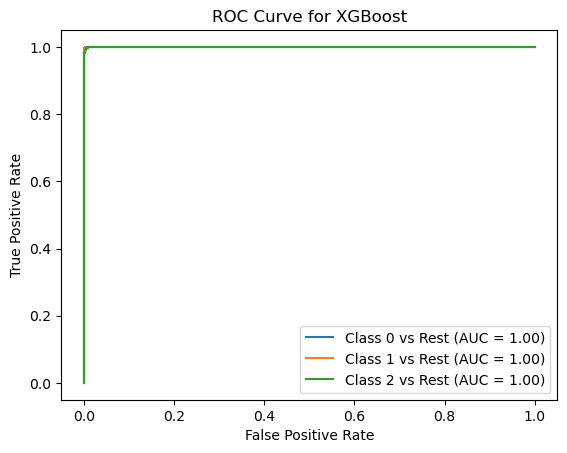

In [75]:
# Loop through each model and compute the metrics
for model_name, model in models.items():
    # Predict on test data
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    sensitivity = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr', average='weighted')

    # Store metrics in dictionary
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Cohen Kappa': kappa,
        'F1 Score': f1,
        'Sensitivity (Recall)': sensitivity,
        'Precision': precision,
        'Confusion Matrix': conf_matrix,
        'AUC': auc
    }

    # Print Confusion Matrix
    print(f"\nConfusion Matrix for {model_name}:\n{conf_matrix}")

    # Plot ROC Curve for each class in a one-vs-rest manner
    plt.figure()
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_label} vs Rest (AUC = {auc:.2f})')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()



In [76]:
# Display all results
for model, metrics in model_metrics.items():
    print(f"\n{model} Metrics:")
    for metric_name, metric_value in metrics.items():
        if metric_name == 'Confusion Matrix':
            print(f"{metric_name}:\n{metric_value}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")



Random Forest Metrics:
Accuracy: 0.9848
Cohen Kappa: 0.9772
F1 Score: 0.9848
Sensitivity (Recall): 0.9848
Precision: 0.9848
Confusion Matrix:
[[1785    0   18]
 [   0 1789   21]
 [  18   25 1744]]
AUC: 0.9996

Decision Tree Metrics:
Accuracy: 0.9906
Cohen Kappa: 0.9858
F1 Score: 0.9905
Sensitivity (Recall): 0.9906
Precision: 0.9905
Confusion Matrix:
[[1794    0    9]
 [   0 1798   12]
 [  14   16 1757]]
AUC: 0.9951

K-Nearest Neighbors Metrics:
Accuracy: 0.9383
Cohen Kappa: 0.9075
F1 Score: 0.9385
Sensitivity (Recall): 0.9383
Precision: 0.9387
Confusion Matrix:
[[1720    0   83]
 [   0 1708  102]
 [  65   83 1639]]
AUC: 0.9923

AdaBoost Metrics:
Accuracy: 0.8402
Cohen Kappa: 0.7603
F1 Score: 0.8412
Sensitivity (Recall): 0.8402
Precision: 0.8446
Confusion Matrix:
[[1558    3  242]
 [   0 1609  201]
 [  76  341 1370]]
AUC: 0.9120

Gradient Boosting Metrics:
Accuracy: 0.9419
Cohen Kappa: 0.9128
F1 Score: 0.9421
Sensitivity (Recall): 0.9419
Precision: 0.9429
Confusion Matrix:
[[1687    0 

## Visualizing the results

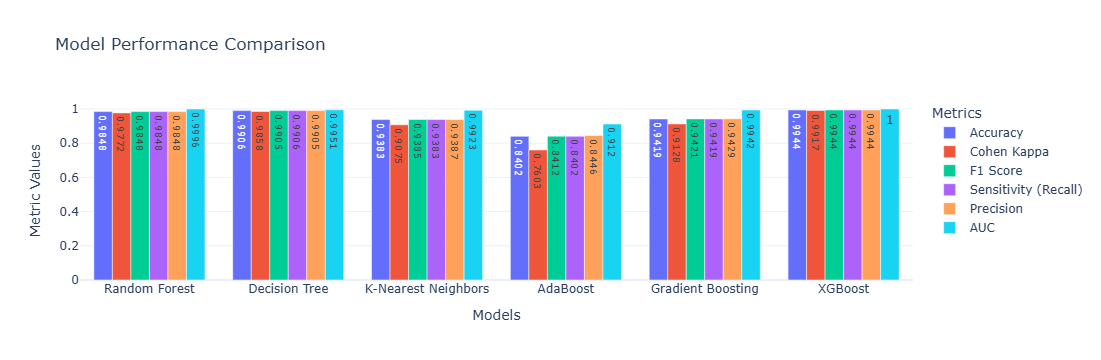

In [78]:
import plotly.graph_objects as go
import pandas as pd

# Model names and performance metrics
models = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "AdaBoost", "Gradient Boosting", "XGBoost"]
metrics = {
    "Accuracy": [0.9848, 0.9906, 0.9383, 0.8402, 0.9419, 0.9944],
    "Cohen Kappa": [0.9772, 0.9858, 0.9075, 0.7603, 0.9128, 0.9917],
    "F1 Score": [0.9848, 0.9905, 0.9385, 0.8412, 0.9421, 0.9944],
    "Sensitivity (Recall)": [0.9848, 0.9906, 0.9383, 0.8402, 0.9419, 0.9944],
    "Precision": [0.9848, 0.9905, 0.9387, 0.8446, 0.9429, 0.9944],
    "AUC": [0.9996, 0.9951, 0.9923, 0.9120, 0.9942, 1.0000]
}

# Convert metrics to a DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics, index=models)

# Plot each metric as a separate bar graph
fig = go.Figure()

# Create a subplot for each metric
for metric in df_metrics.columns:
    fig.add_trace(
        go.Bar(
            x=models,
            y=df_metrics[metric],
            name=metric,
            text=df_metrics[metric],
            textposition="auto"
        )
    )

# Update layout for better readability and appearance
fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Models",
    yaxis_title="Metric Values",
    barmode="group",
    template="plotly_white",
    legend_title="Metrics"
)

# Show the plot
fig.show()


Accuracy (0.9944): Indicates that 99.44% of the predictions made by the XGBoost model were correct.

Cohen Kappa (0.9917): Measures the agreement between predictions and true labels, considering chance agreement. A value of 0.9917 indicates near-perfect agreement.

F1 Score (0.9944): The harmonic mean of precision and recall, reflecting excellent model performance, particularly in imbalanced datasets.

Sensitivity/Recall (0.9944): The model correctly identified 99.44% of the positive cases (true positives).

Precision (0.9944): 99.44% of the predictions labeled as positive were actually correct.

AUC (1.0000): The Area Under the Curve indicates perfect separation between classes by the model.


## Making predictions

In [81]:
# Given input data
data = {
    'sc_point_gid': [54790.000000],
    'cnty_fips': [4005.000000],
    'latitude': [36.136000],
    'longitude': [-112.918000],
    'area_sq_km': [57.285466],
    'elevation': [1680.384615],
    'timezone': [-7.000000],
    'dist_km': [4.717166],
    'capacity_mw_ac': [1838.264616],
    'capacity_mw_dc': [2463.275049],
    'mean_cf_ac': [0.250443],
    'mean_lcoe': [35.190000],
    'trans_cap_cost_per_mw_ac': [12.685501],
    'reinforcement_cost_per_mw_ac': [14.241655],
    'total_lcoe': [1.698992]
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(data)

# Log-transform the necessary columns
for col in ['dist_km', 'trans_cap_cost_per_mw_ac', 'reinforcement_cost_per_mw_ac', 'total_lcoe']:
    input_df[col] = np.log1p(input_df[col])

# Scale the input features (excluding target and categorical columns)
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_df)  # Assumes scaler is fitted on the training data

# Make predictions using the trained XGBoost model
predicted_category = xb.predict(input_scaled)

# Fit the LabelEncoder with categories from the training phase 
label_encoder.fit(['low-cost', 'medium-cost', 'high-cost'])  

# Decode the predicted label to its original category
decoded_category = label_encoder.inverse_transform(predicted_category)

print("Predicted Cost Category (Encoded):", predicted_category[0])
print("Predicted Cost Category (Decoded):", decoded_category[0])


Predicted Cost Category (Encoded): 2
Predicted Cost Category (Decoded): medium-cost


The county with fips code 4005 have a medium-cost for implementing solar panel

In [83]:
county_fips(4005)

The state is Arizona and the county is Coconino for cnty_fips 4005.


The Coconino county of Arizona state is optimal site with medium cost for implementing solar panel.